In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

# from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
from statsmodels.graphics.gofplots import qqplot

In [3]:
df = pd.read_csv('bhp.csv')

### EDA

In [4]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [6]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [7]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [8]:
df['location'].nunique()

241

In [9]:
df.loc[df['size'] == '43 Bedroom']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500


In [10]:
df.loc[df['bath'] == df['bath'].max()]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500


In [11]:
# Multiple conditions
df.loc[(df['price'] == 23) & (df['price_per_sqft'] == 51111) & (df['total_sqft'] == 45)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111


In [12]:
df.loc[df['size'] == '1 RK']['total_sqft'].min()

296.0

In [13]:
df.loc[df['size'] == '1 RK'][['total_sqft', 'price_per_sqft']]

,total_sqft,price_per_sqft
24,510.0,4950
771,445.0,6292
1345,510.0,4950
2457,296.0,7733
2527,351.0,4558
2757,440.0,6363
4829,435.0,4482
5030,905.0,5745
5236,412.5,4800
6518,360.0,4694


In [14]:
df[df.bhk == 1]['total_sqft'].min()

15.0

In [15]:
df.loc[df[df.bhk == 1]['total_sqft'].min()]

location          Mysore Road
size                    2 BHK
total_sqft             1175.0
bath                      2.0
price                    73.5
bhk                         2
price_per_sqft           6255
Name: 15, dtype: object

In [16]:
df.loc[df['size'] == '1 RK'].sort_values('total_sqft', axis = 0, ascending = True)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2457,Bhoganhalli,1 RK,296.0,1.0,22.89,1,7733
2527,Anekal,1 RK,351.0,1.0,16.00,1,4558
6518,Electronics City Phase 1,1 RK,360.0,1.0,16.90,1,4694
5236,Rachenahalli,1 RK,412.5,1.0,19.80,1,4800
4829,Electronic City,1 RK,435.0,1.0,19.50,1,4482
2757,Rachenahalli,1 RK,440.0,1.0,28.00,1,6363
771,Thanisandra,1 RK,445.0,1.0,28.00,1,6292
24,Thanisandra,1 RK,510.0,1.0,25.25,1,4950
1345,Thanisandra,1 RK,510.0,1.0,25.25,1,4950
8294,Banaswadi,1 RK,527.0,1.0,35.00,1,6641


In [17]:
# 1 RK values are not 1 BHK but are included as 1 BHK in the bhk column 
len(df.loc[df['size'] == '1 RK'])

13

In [18]:
df.loc[df['size'] == '1 RK'].index

Int64Index([24, 771, 1345, 2457, 2527, 2757, 4829, 5030, 5236, 6518, 7556,
            8294, 10471],
           dtype='int64')

In [19]:
# Since there are only 13 values, they can be removed
# Will be reomved with outliers
rk_indexes = df.loc[df['size'] == '1 RK'].index
df.drop(rk_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 Bedroom', '8 Bedroom', '2 Bedroom', '7 Bedroom',
       '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK', '9 BHK',
       '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom', '10 BHK',
       '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK', '12 Bedroom',
       '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
# Dropping the size column as it has no meaning since the bhk column gives the same info 
df.drop(('size'), axis=1, inplace=True)

In [22]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250


### Handling Outliers

In [23]:
# Creating a list of features
columns = list(df)
columns.remove('location')

In [24]:
columns

['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']

##### Plotting box plots

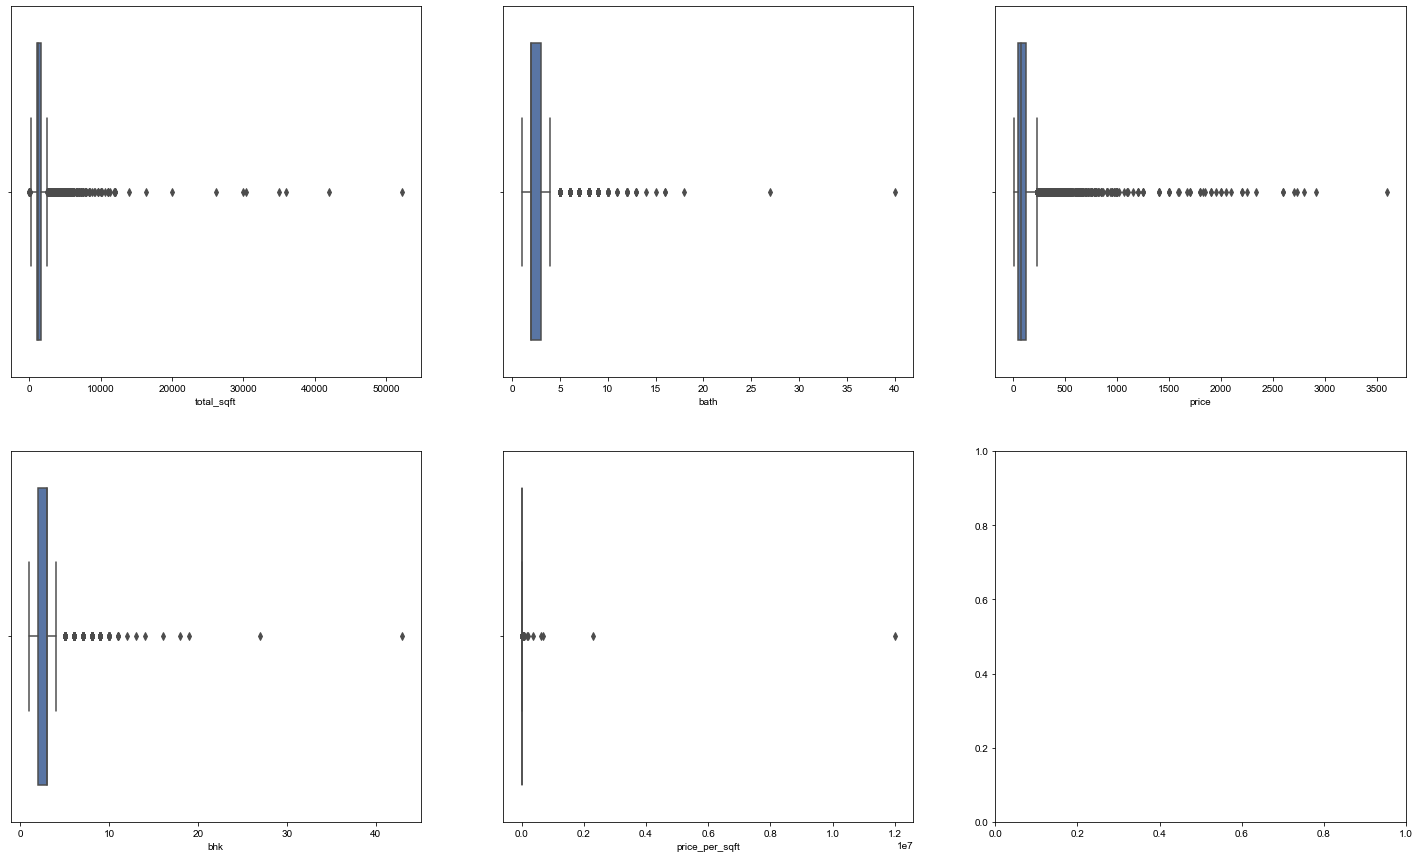

In [25]:
f, axes = plt.subplots(2, 3, figsize=(25, 15))

n=0
sns.set(font_scale = 1)
for col_name in columns:
    i, j = divmod(n, 3) # divmod returns quotent and remainder (Useful for suplot axes)
    # print(i, j)
    sns.boxplot(x=col_name, data=df, ax=axes[i, j])
    # sns.violinplot(x=col_name, data=df, ax=axes[i, j])
    n += 1

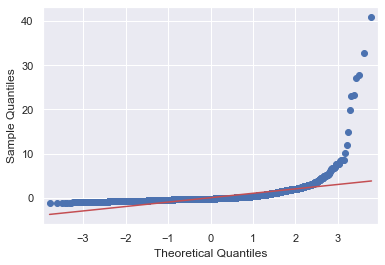

In [26]:
# plt.figure(figsize=[25, 20])
# fig = plt.plot(figsize=(25, 20))
qqplot(df['total_sqft'], line='s', fit=True)
# qqplot(df['price'], line='s')
plt.show()

    QQ Plot, plots the sample quantiles against theoretical quantiles.
    If the points fall on the straight line then the data is normally distributed.

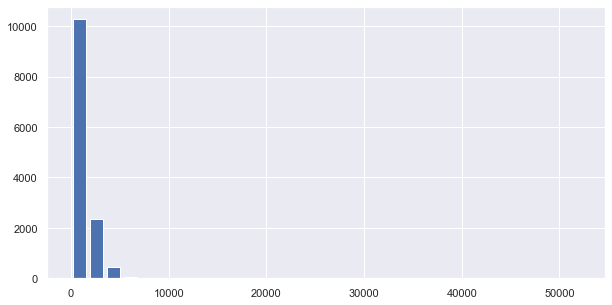

In [27]:
plt.figure(figsize=[10, 5])
plt.hist(df.total_sqft, bins=30, rwidth=0.8)
plt.show()

#### Using Z-Score Technique

In [28]:
columns

['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']

#### Getting outliers for all columns

In [29]:
# outliers_idxs = []
# threshold = 3

# for column in columns:
#     mean = np.mean(df[column])
#     std = np.std(df[column])

#     for index, row in df.iterrows():
#         z_score = (row[column] - mean) / std
        
#         if np.abs(z_score) > threshold:
#             outliers_idxs.append(index)


### Vectorization

    - Using iterrows() is not recommended because it does a lot of processing for iterating over the rows.
    - This defeats the purpose of using a pandas dataframe.
    - On smaller datasets and a powerful machine it wont be noticable.
    - But when using a very large dataset iterrows() takes a lot of time.
    - Therefore it is suitable to use vectorising operations on the dataframe. 

In [30]:
# Creating a copy. deep=True so that a copy is created and not just a reference.
df_clean_zscore = df.copy(deep=True)

In [31]:
# Vectorised solution: Converting row to numpy array. Results in very fast convergence.

def detect_outliers(dframe, columns):

    threshold = 3
    outliers_indexes = []

    for column in columns:
        i_num = 0
        std = np.std(dframe[column])
        mean = np.mean(dframe[column])

        for row in dframe[column].to_numpy():
            i_num += 1
            z_score = (row - mean) / std
            
            if np.abs(z_score) > threshold:
                outliers_indexes.append(i_num - 1)

    return outliers_indexes


# Dropping outliers
def outlier_rmvr_zscore(dframe, out_indexes):
    
    # 816
    print('Outliers before removing repeated rows:', len(out_indexes))

    # There are many rows repeating as there are multiple outliers for a single row. 
    # Therefore, removing duplicate values before dropping the rows.
    out_indexes.sort()
    out_indexes = list(dict.fromkeys(out_indexes))
    print('Outliers after removing repeated rows:', len(out_indexes)) # The total number of outliers 523

    # Length after dropping outliers 12664
    print('Length of dataframe after dropping outliers:', dframe.shape[0] - len(out_indexes))

    # Dropping outliers
    dframe.drop(out_indexes, inplace=True)
    dframe.reset_index(drop=True, inplace=True)

#### Dropping outliers

In [32]:
# Getting indexes
outliers_idxs = detect_outliers(df_clean_zscore, columns)

In [33]:
outlier_rmvr_zscore(df_clean_zscore, outliers_idxs)

Outliers before removing repeated rows: 816
Outliers after removing repeated rows: 523
Length of dataframe after dropping outliers: 12664


In [34]:
# Outliers from 'price_per_sqft' column
df.loc[[344, 1104, 4038, 4917, 11434]]

,location,total_sqft,bath,price,bhk,price_per_sqft
344,other,11.0,3.0,74.0,3,672727
1104,other,24.0,2.0,150.0,5,625000
4038,Sarjapur Road,1.0,4.0,120.0,4,12000000
4917,other,5.0,7.0,115.0,7,2300000
11434,Whitefield,60.0,4.0,218.0,4,363333


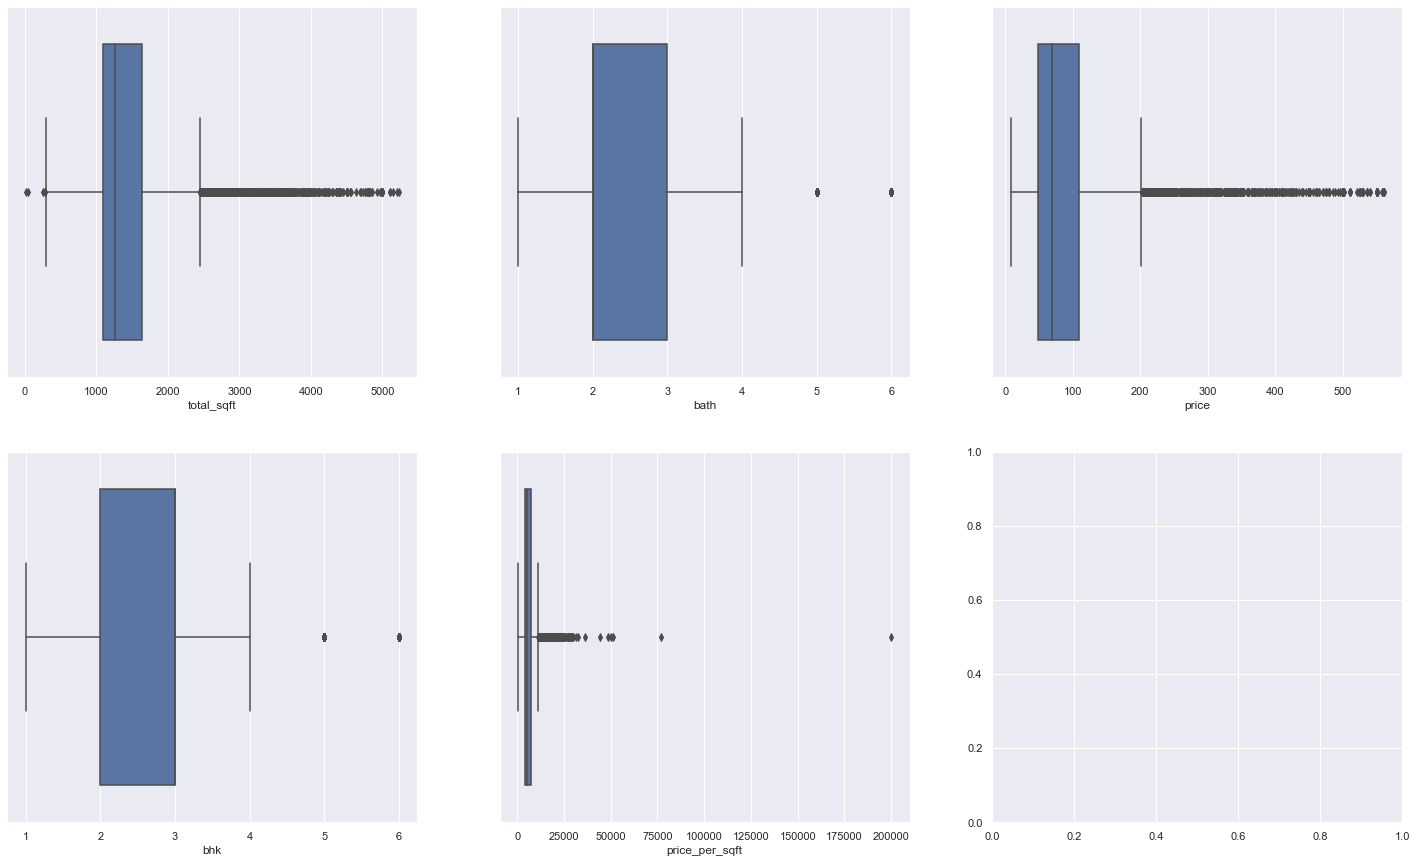

In [35]:
# Checking boxplot again
f, axes = plt.subplots(2, 3, figsize=(25, 15))

n=0
sns.set(font_scale = 1)
for col_name in columns:
    i, j = divmod(n, 3)
    sns.boxplot(x=col_name, data=df_clean_zscore, ax=axes[i, j])
    n += 1

    There is a good improvement in the data. 
    Still outliers exist but the range of the values have been significantly reduced. 

In [36]:
columns_r2 = ['total_sqft', 'price', 'price_per_sqft']

In [37]:
columns_r2

['total_sqft', 'price', 'price_per_sqft']

In [38]:
# Getting indexes and removing outiliers again
outliers_idxs = detect_outliers(df_clean_zscore, columns_r2)
outlier_rmvr_zscore(df_clean_zscore, outliers_idxs)

Outliers before removing repeated rows: 881
Outliers after removing repeated rows: 687
Length of dataframe after dropping outliers: 11977


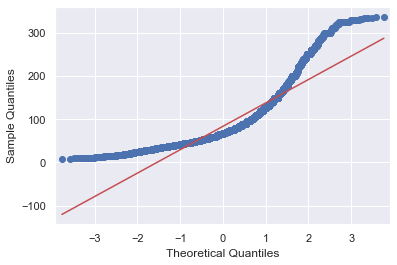

In [39]:
qqplot(df_clean_zscore['price'], line='s')
plt.show()

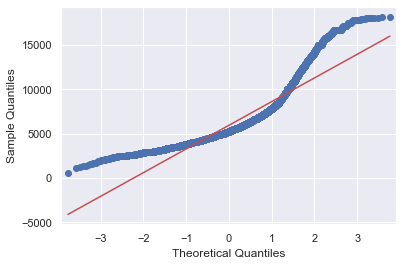

In [40]:
qqplot(df_clean_zscore['price_per_sqft'], line='s')
plt.show()

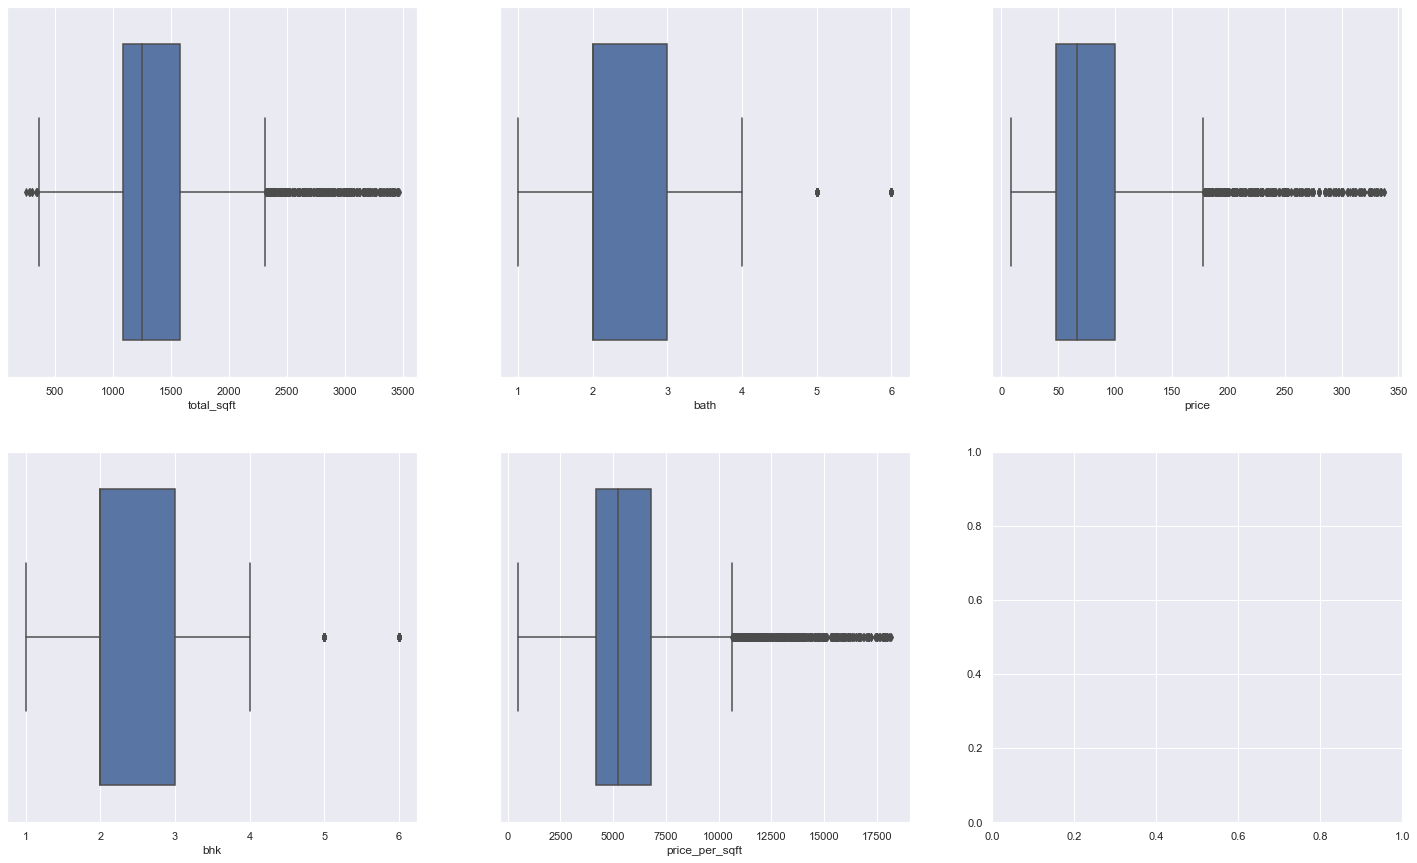

In [41]:
# Checking boxplot again
f, axes = plt.subplots(2, 3, figsize=(25, 15))

n=0
sns.set(font_scale = 1)
for col_name in columns:
    i, j = divmod(n, 3)
    sns.boxplot(x=col_name, data=df_clean_zscore, ax=axes[i, j])
    n += 1


    We are getting inconclusive results using Z-Score.

#### Using IQR Technique
    Basic explanation of IQR Technique.

In [42]:
import math

list_1 = [1,2,3,4,5,5,6,7,8,9,10,27]

# Q1 is 25th percentile and Q3 is 75th percentile
l_q1 = list_1[math.floor((25 * (len(list_1)+1))/100)]
print('Q1:', l_q1)

l_q3 = list_1[math.floor((75 * (len(list_1)+1))/100)]
print('Q2:', l_q3)

l_iqr = l_q3 - l_q1
print('IQR:', l_iqr)

lb = l_q1 - 1.5*(l_iqr)
print('Lower Bracket:', lb)

hb = l_q3 + 1.5*(l_iqr)
print('Higher Bracket:', hb)

for i in list_1:
    if i < lb or i > hb:
        print('Outlier:', i)
        list_1.remove(i)

print('After removing outlier:', list_1)

Q1: 4
Q2: 9
IQR: 5
Lower Bracket: -3.5
Higher Bracket: 16.5
Outlier: 27
After removing outlier: [1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10]


In [43]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13187.000000,13187.000000,13187.000000,13187.000000,1.318700e+04
mean,1556.349832,2.692804,112.359138,2.802609,7.922565e+03
std,1237.474381,1.338521,149.225702,1.292243,1.067797e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266000e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438000e+03
75%,1674.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [44]:
def outlier_rmvr_iqr(dframe):
    # Calculate and print IQR for numerical columns  
    Q1 = dframe.quantile(0.25)
    Q3 = dframe.quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR)

    # Calculating lower bound and upper bound value for each column
    lower_bound = Q1 - (1.5 * IQR)
    print('Lower bound \n', lower_bound, sep='')

    upper_bound = Q3 + (1.5 * IQR)
    print('\nUpper bound \n', upper_bound, sep='')

    # To select only numeric columns. Otherwise it gives a warning.
    dframe = dframe[~((dframe.select_dtypes(include=np.number) < lower_bound) | (dframe.select_dtypes(include=np.number) > upper_bound)).any(axis=1)]
    
    print('\nRows after removing outliers:', dframe.shape[0])

    return dframe

In [45]:
df_clean_iqr = outlier_rmvr_iqr(df)

Lower bound 
total_sqft        239.0
bath                0.5
price             -55.0
bhk                 0.5
price_per_sqft   -310.5
dtype: float64

Upper bound 
total_sqft         2535.0
bath                  4.5
price               225.0
bhk                   4.5
price_per_sqft    11893.5
dtype: float64

Rows after removing outliers: 10661


In [46]:
df_clean_iqr.shape[0]

10661

In [47]:
df_clean_iqr.reset_index(drop=True, inplace=True)

In [48]:
df_clean_iqr

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Uttarahalli,1440.0,2.0,62.00,3,4305
2,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
3,Kothanur,1200.0,2.0,51.00,2,4250
4,Whitefield,1170.0,2.0,38.00,2,3247
...,...,...,...,...,...,...
10656,Bellandur,1262.0,2.0,47.00,2,3724
10657,Uttarahalli,1345.0,2.0,57.00,3,4237
10658,Green Glen Layout,1715.0,3.0,112.00,3,6530
10659,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258


In [49]:
df.shape[0] - df_clean_iqr.shape[0]

2526

In [50]:
df_clean_iqr.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Uttarahalli,1440.0,2.0,62.00,3,4305
2,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
3,Kothanur,1200.0,2.0,51.00,2,4250
4,Whitefield,1170.0,2.0,38.00,2,3247


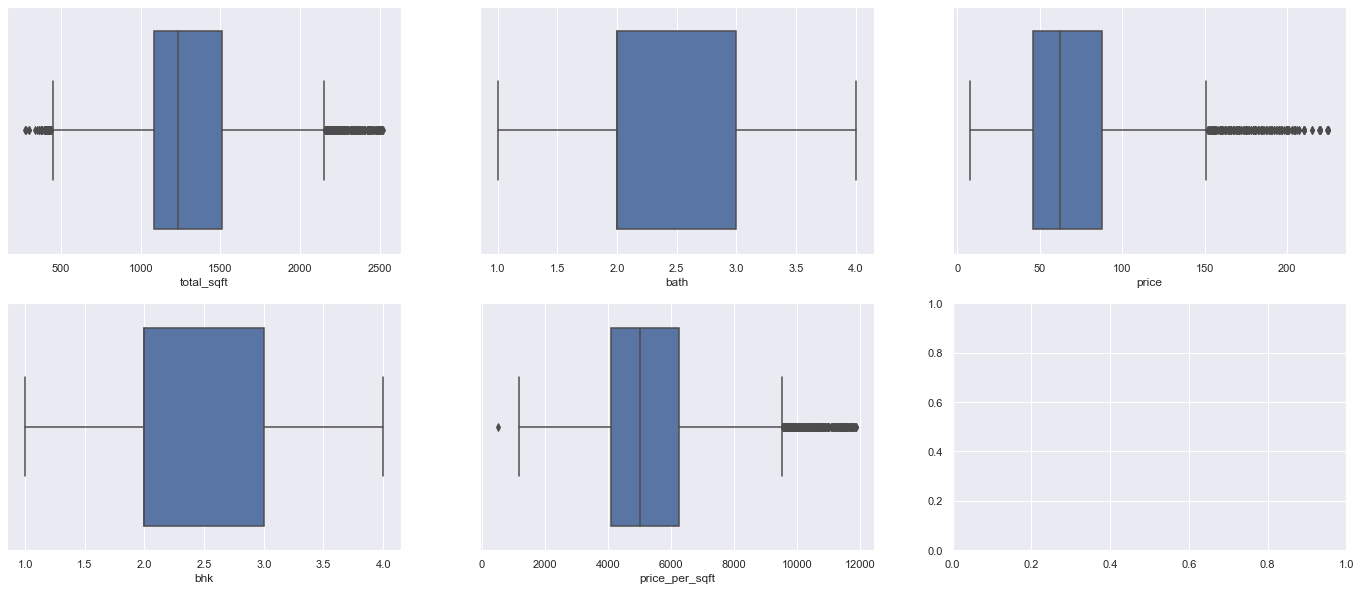

In [51]:
f, axes = plt.subplots(2, 3, figsize=(24, 10))

n=0
for col_name in columns:
    i, j = divmod(n, 3)
    sns.boxplot(x=col_name, data=df_clean_iqr, ax=axes[i, j])
    # sns.violinplot(x=col_name, data=df, ax=axes[i, j])
    n += 1

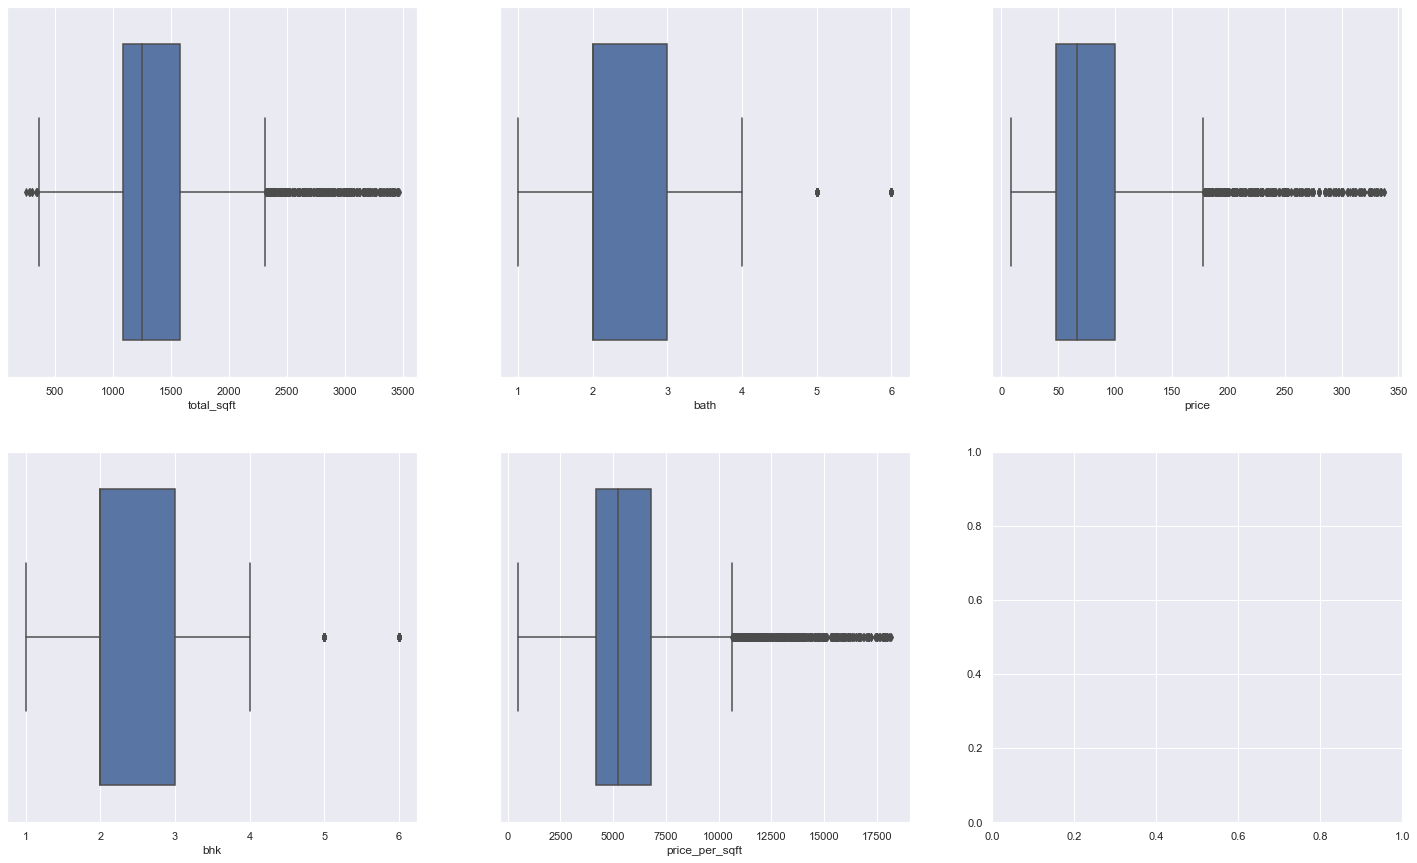

In [52]:
# Checking boxplot again
f, axes = plt.subplots(2, 3, figsize=(25, 15))

n=0
sns.set(font_scale = 1)
for col_name in columns:
    i, j = divmod(n, 3)
    sns.boxplot(x=col_name, data=df_clean_zscore, ax=axes[i, j])
    n += 1

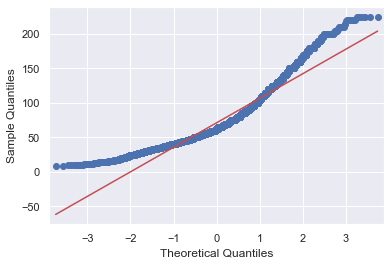

In [53]:
qqplot(df_clean_iqr['price'], line='s')
plt.show()

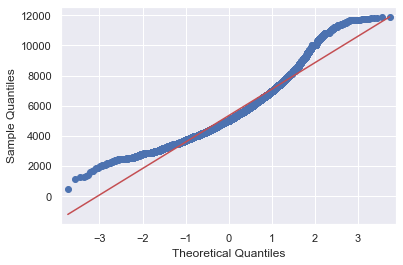

In [54]:
qqplot(df_clean_iqr['price_per_sqft'], line='s')
plt.show()

In [55]:
percentiles = [98, 76.37, 55.55, 69, 88] 
first_subject = np.array(percentiles) 
print(first_subject.dtype)

float64


In [56]:
df.std(numeric_only=True)

total_sqft          1237.474381
bath                   1.338521
price                149.225702
bhk                    1.292243
price_per_sqft    106779.729180
dtype: float64

In [57]:
df_clean_zscore.std(numeric_only=True)

total_sqft         497.875161
bath                 0.882671
price               54.107289
bhk                  0.853549
price_per_sqft    2671.071865
dtype: float64

In [58]:
df_clean_iqr.std(numeric_only=True)

total_sqft         373.284907
bath                 0.642600
price               35.566609
bhk                  0.650253
price_per_sqft    1754.076740
dtype: float64

    Outliers are still present in 'price_per_sqft' and 'total_sqft' columns, but the overall distribution is better.
    The IQR technique is giving better distributed data. 

In [59]:
df.shape[0]

13187

In [60]:
(df.shape[0] - df_clean_zscore.shape[0]) / df.shape[0]

0.09175703344202624

In [61]:
(df.shape[0] - df_clean_iqr.shape[0]) / df.shape[0]

0.19155228634261015


    9% of the original data in Z-Score and 19% in IQR technique is removed as outlier.

#### Splitting the data into training and testing sets

In [62]:
from sklearn.model_selection import train_test_split as ttp

In [63]:
df_clean_iqr.shape

(10661, 6)

In [64]:
# Dropping dependent and categorical variable from X
X = df_clean_iqr.drop(['price_per_sqft', 'location'], axis=1)
Y = df_clean_iqr['price_per_sqft']

In [65]:
X_train, X_test, Y_train, Y_test = ttp(X, Y, random_state = 42)

#### XGBoost Regression Model

In [66]:
import xgboost as xgb
from xgboost import XGBRegressor

In [67]:
# Defining data_matrix
data_dmatrix = xgb.DMatrix(data=X, label=Y)

In [68]:
model = XGBRegressor()

In [69]:
df_clean_iqr.sample(5)

,location,total_sqft,bath,price,bhk,price_per_sqft
7331,other,1500.0,3.0,90.00,3,6000
6089,Sarjapur Road,914.0,2.0,32.00,2,3501
4360,Hosa Road,1532.0,3.0,98.13,3,6405
7457,other,1155.0,2.0,65.00,2,5627
8413,Dommasandra,999.0,2.0,32.90,2,3293


In [70]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

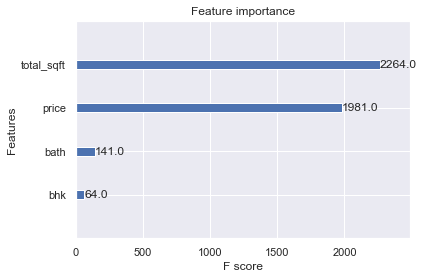

In [71]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()


    'total_sqft' and 'price' are the most important columns

In [72]:
from sklearn.metrics import mean_squared_error, r2_score 

#### Train Performance

In [73]:
pred_train = model.predict(X_train)
print(r2_score(Y_train, pred_train))

0.9995064147850478


In [74]:
print(mean_squared_error(Y_train, pred_train))

1499.555038984514


#### Test Performance

In [75]:
pred_test = model.predict(X_test)
print(r2_score(Y_test, pred_test))

0.9977899974194102


In [76]:
print(mean_squared_error(Y_test, pred_test))

7049.870762403411


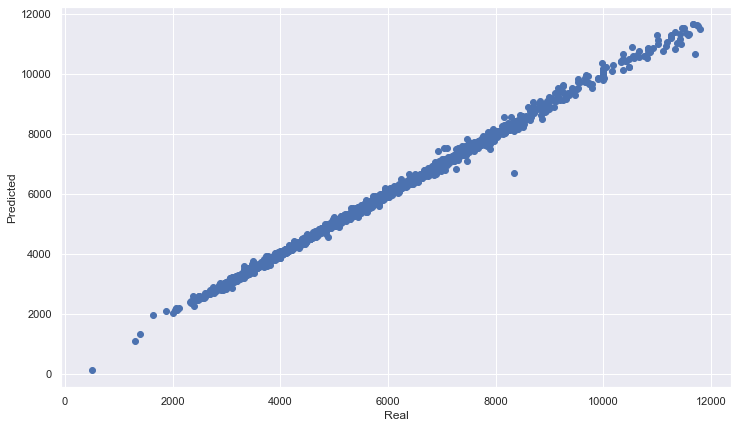

In [77]:
plt.figure(figsize=(12, 7))
plt.scatter(Y_test, pred_test)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()